<a href="https://colab.research.google.com/github/DanaGuber/MachineLearning/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier


In [180]:
#Visualizo el df
df=pd.read_csv('https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv')


In [181]:
df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [182]:
#Miro valores que podrían interesarme
df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [183]:
#Hago histogramas de los datos para ver los valores más frecuentes
def graficos4(x1,x2,x3,x4):
  plt.figure(figsize=(20,20))
  plt.subplot(2,2,1)
  plt.hist(x1, bins=30)
  plt.xlabel(x1.name)
  plt.title(x1.name)
  plt.subplot(2,2,2)
  plt.hist(x2, bins=30)
  plt.xlabel(x2.name)
  plt.title(x2.name)
  plt.subplot(2,2,3)
  plt.hist(x3, bins=30)
  plt.xlabel(x3.name)
  plt.title(x3.name)
  plt.subplot(2,2,4)
  plt.hist(x4, bins=30)
  plt.xlabel(x4.name)
  plt.title(x4.name)


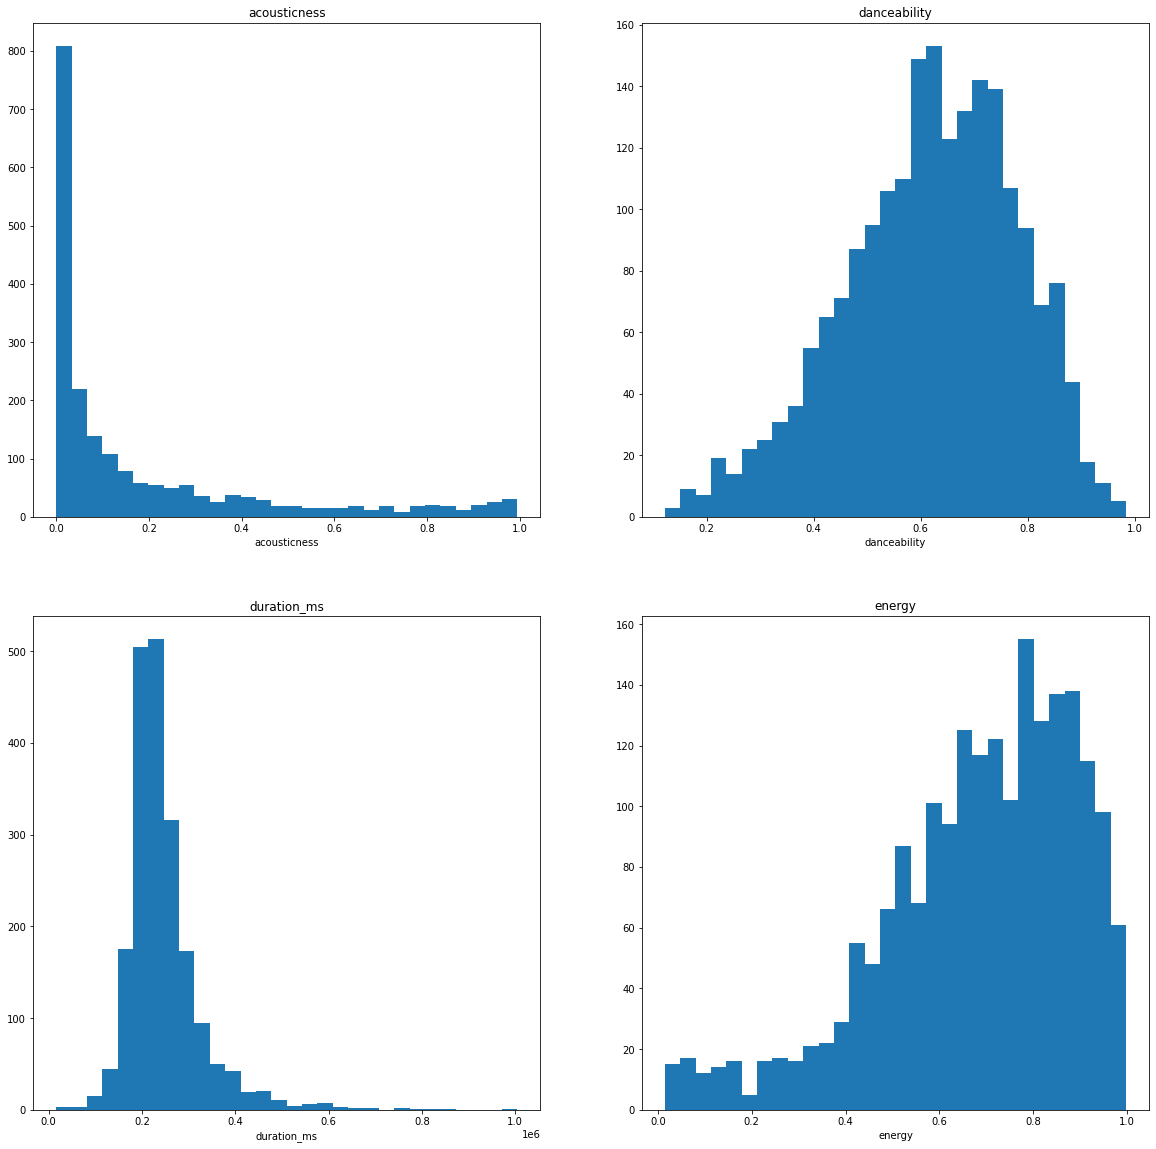

In [184]:
graficos4(df['acousticness'],df['danceability'],df['duration_ms'],df['energy'])

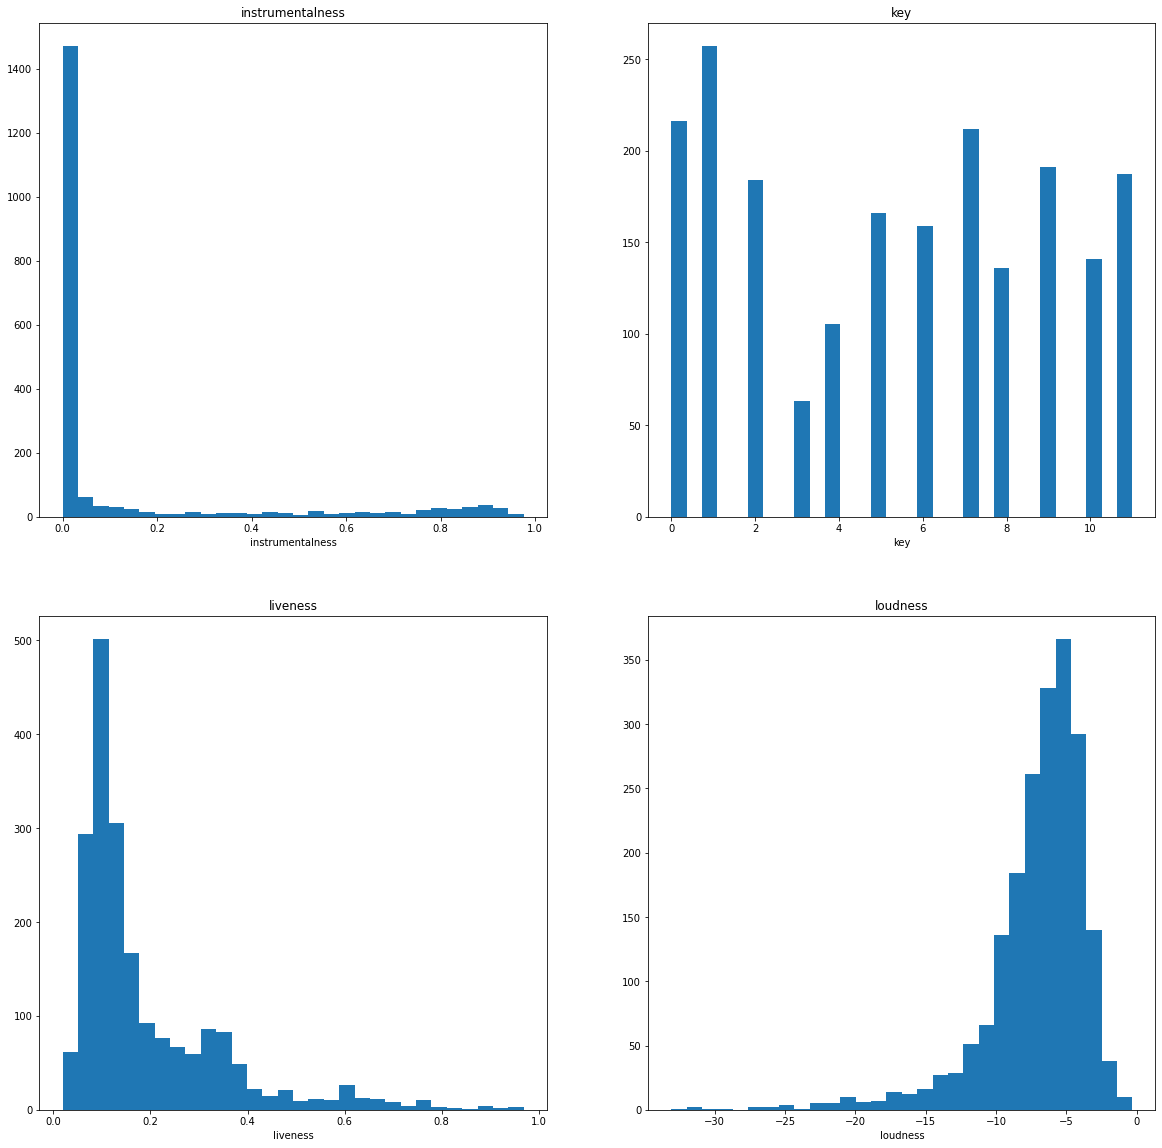

In [185]:
graficos4(df['instrumentalness'],df['key'],df['liveness'],df['loudness'])

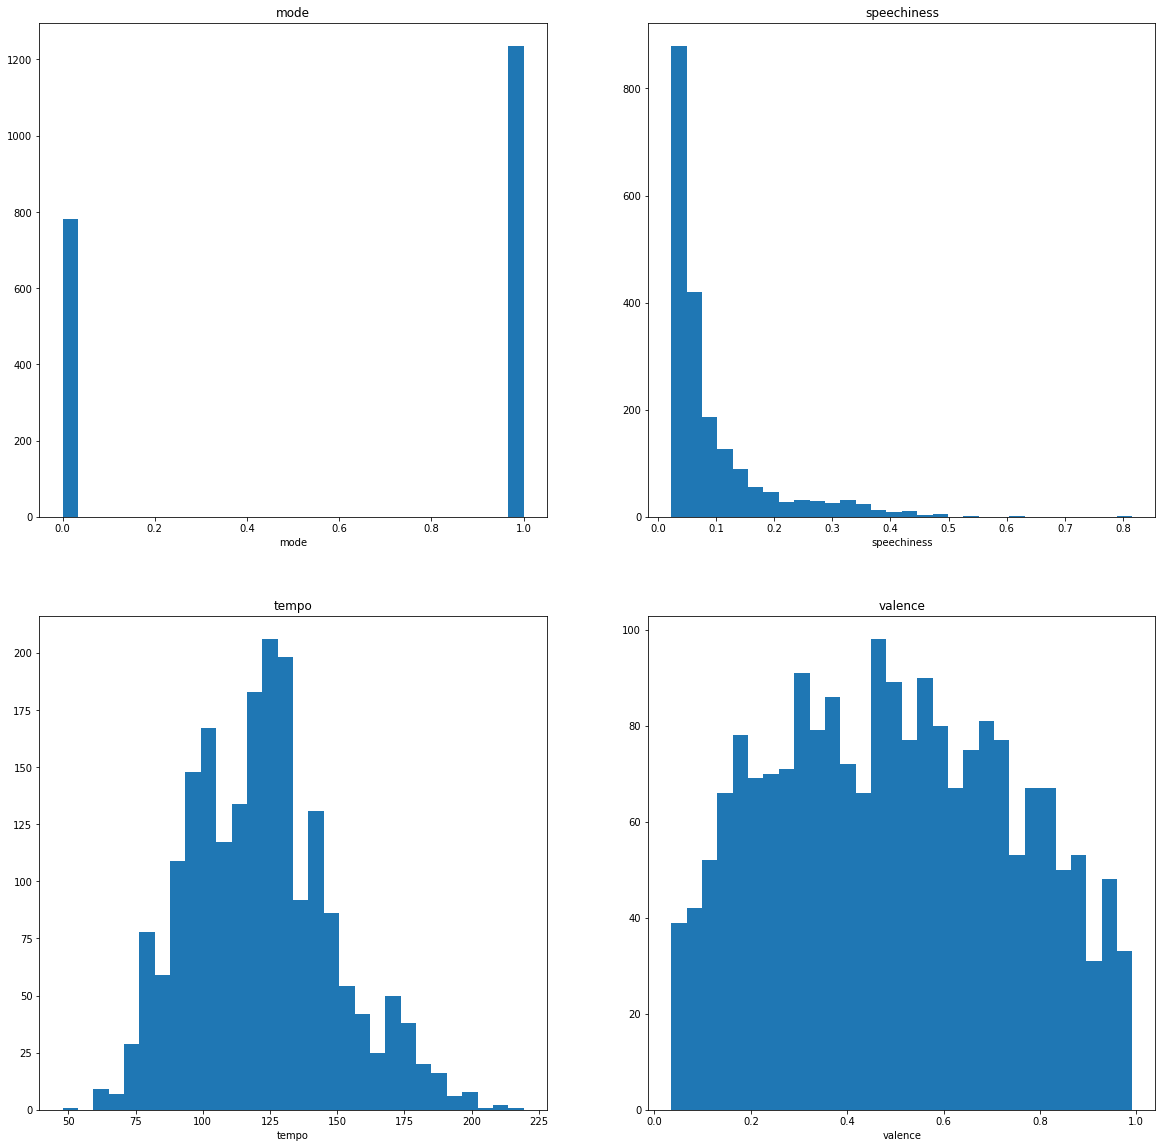

In [186]:
graficos4(df['mode'],df['speechiness'],df['tempo'],df['valence'])

In [187]:
#Hago lo mismo pero diferenciando los valores de los casos donde gustó el tema y donde disgustó.
def gusta_disgusta(atributo1, atributo2, atributo3, atributo4):
   gusta1=df[df['target']==1][atributo1]
   disgusta1=df[df['target']==0][atributo1]
   plt.figure(figsize=(20,20))
   plt.subplot(2,2,1)
   plt.title(atributo1)
   gusta1.hist(alpha=0.3, bins=20, color='blue', label='gusta')
   disgusta1.hist(alpha=0.5, bins=20, color='pink', label='disgusta')
   gusta2=df[df['target']==1][atributo2]
   disgusta2=df[df['target']==0][atributo2]
   plt.subplot(2,2,2)
   plt.title(atributo2)
   gusta2.hist(alpha=0.5, bins=20, color='blue', label='gusta')
   disgusta2.hist(alpha=0.5, bins=20, color='pink', label='disgusta')
   gusta3=df[df['target']==1][atributo3]
   disgusta3=df[df['target']==0][atributo3]
   plt.subplot(2,2,3)
   plt.title(atributo3)
   gusta3.hist(alpha=0.5, bins=20, color='blue', label='gusta')
   disgusta3.hist(alpha=0.5, bins=20, color='pink', label='disgusta')
   gusta4=df[df['target']==1][atributo4]
   disgusta4=df[df['target']==0][atributo4]
   plt.subplot(2,2,4)
   plt.title(atributo4)
   gusta4.hist(alpha=0.5, bins=20, color='blue', label='gusta')
   disgusta4.hist(alpha=0.5, bins=20, color='pink', label='disgusta')





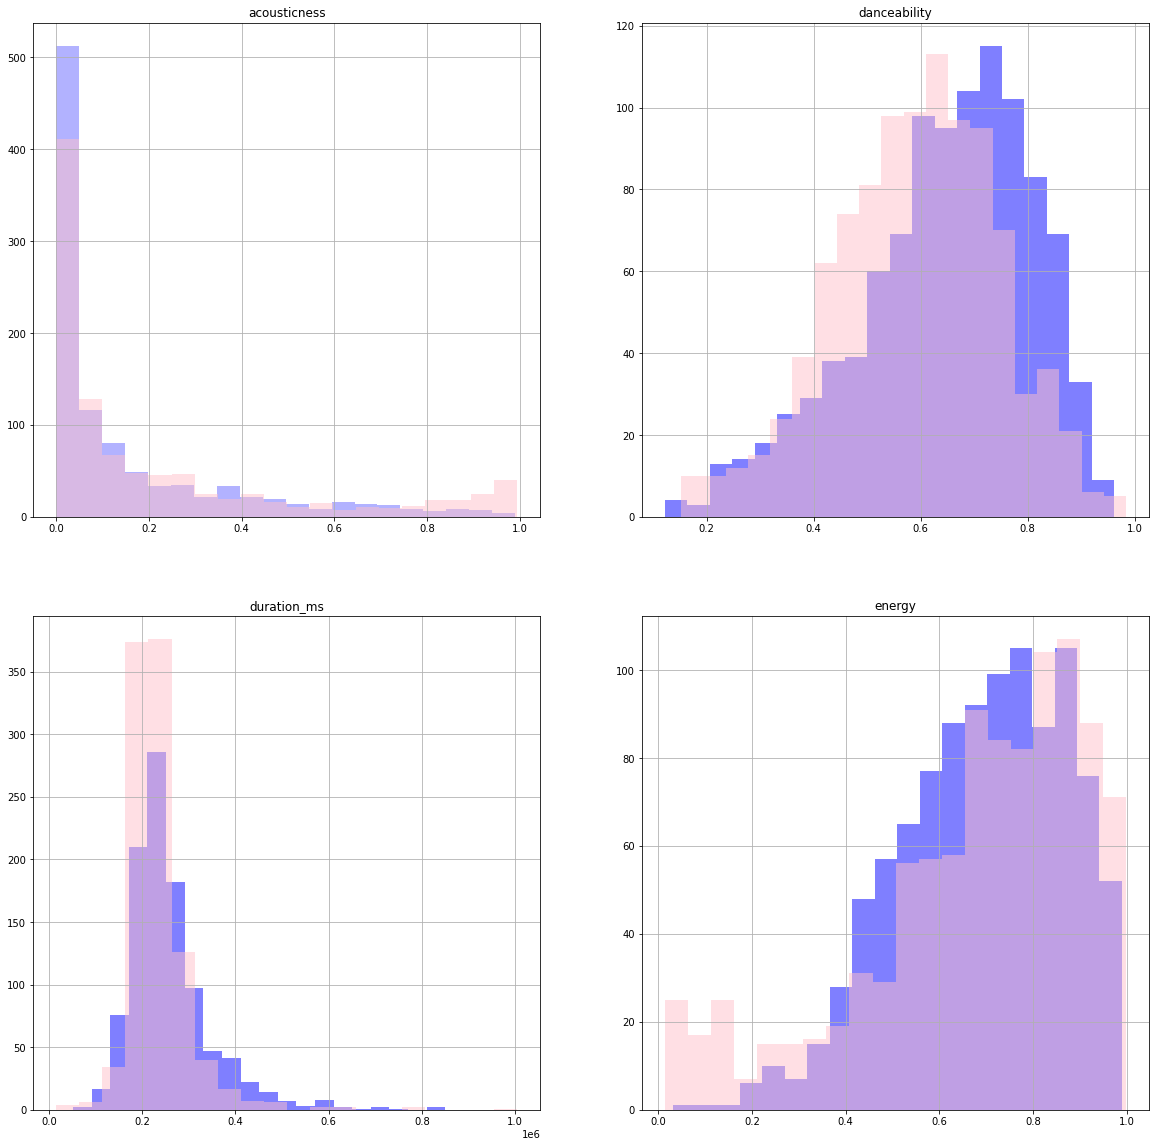

In [188]:
gusta_disgusta('acousticness','danceability','duration_ms','energy')

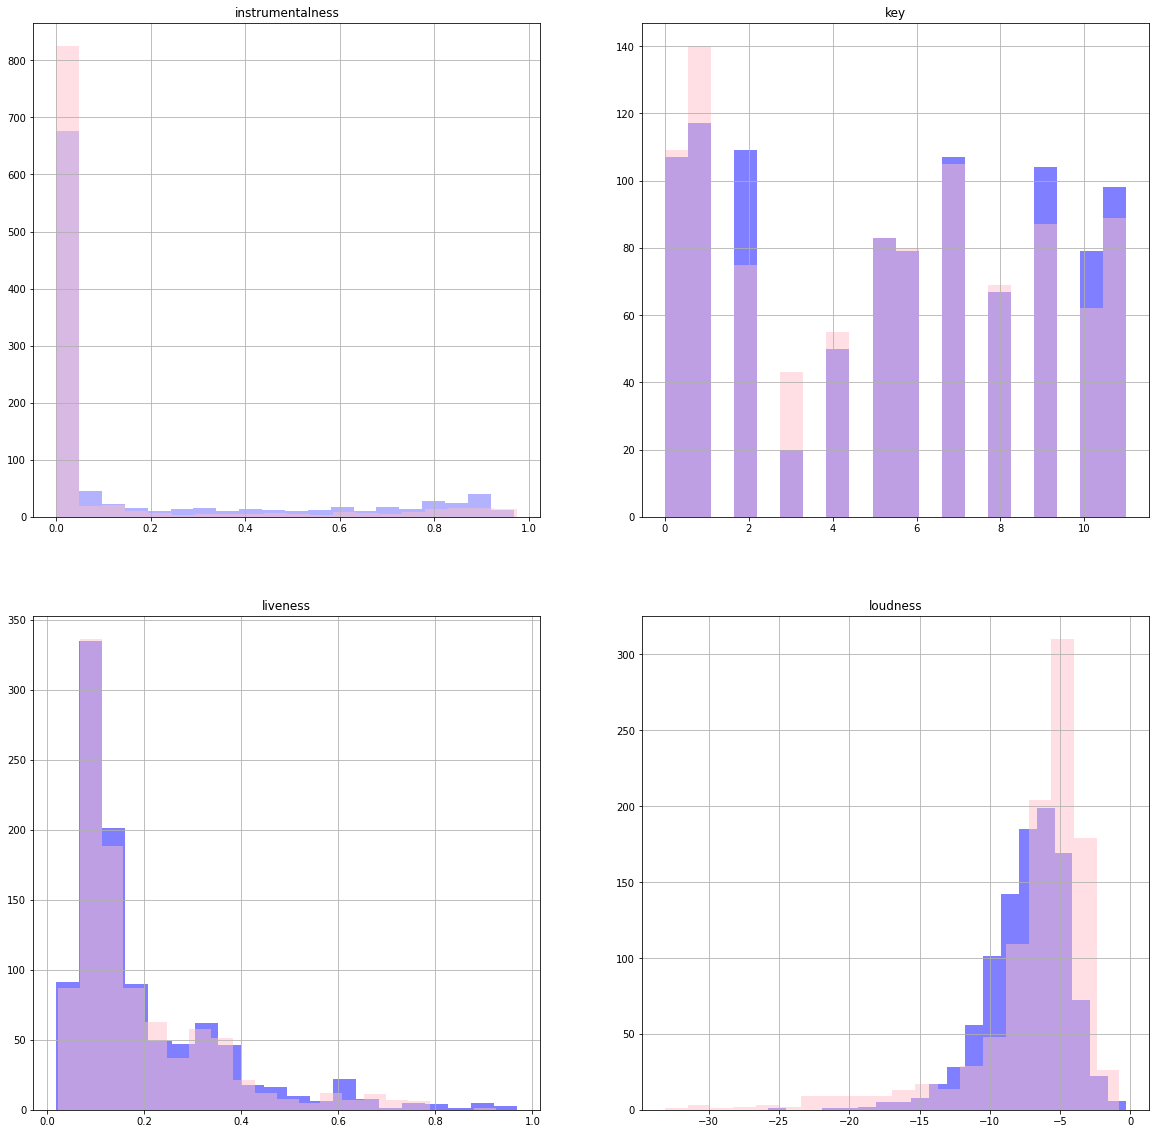

In [189]:
gusta_disgusta('instrumentalness','key','liveness','loudness')

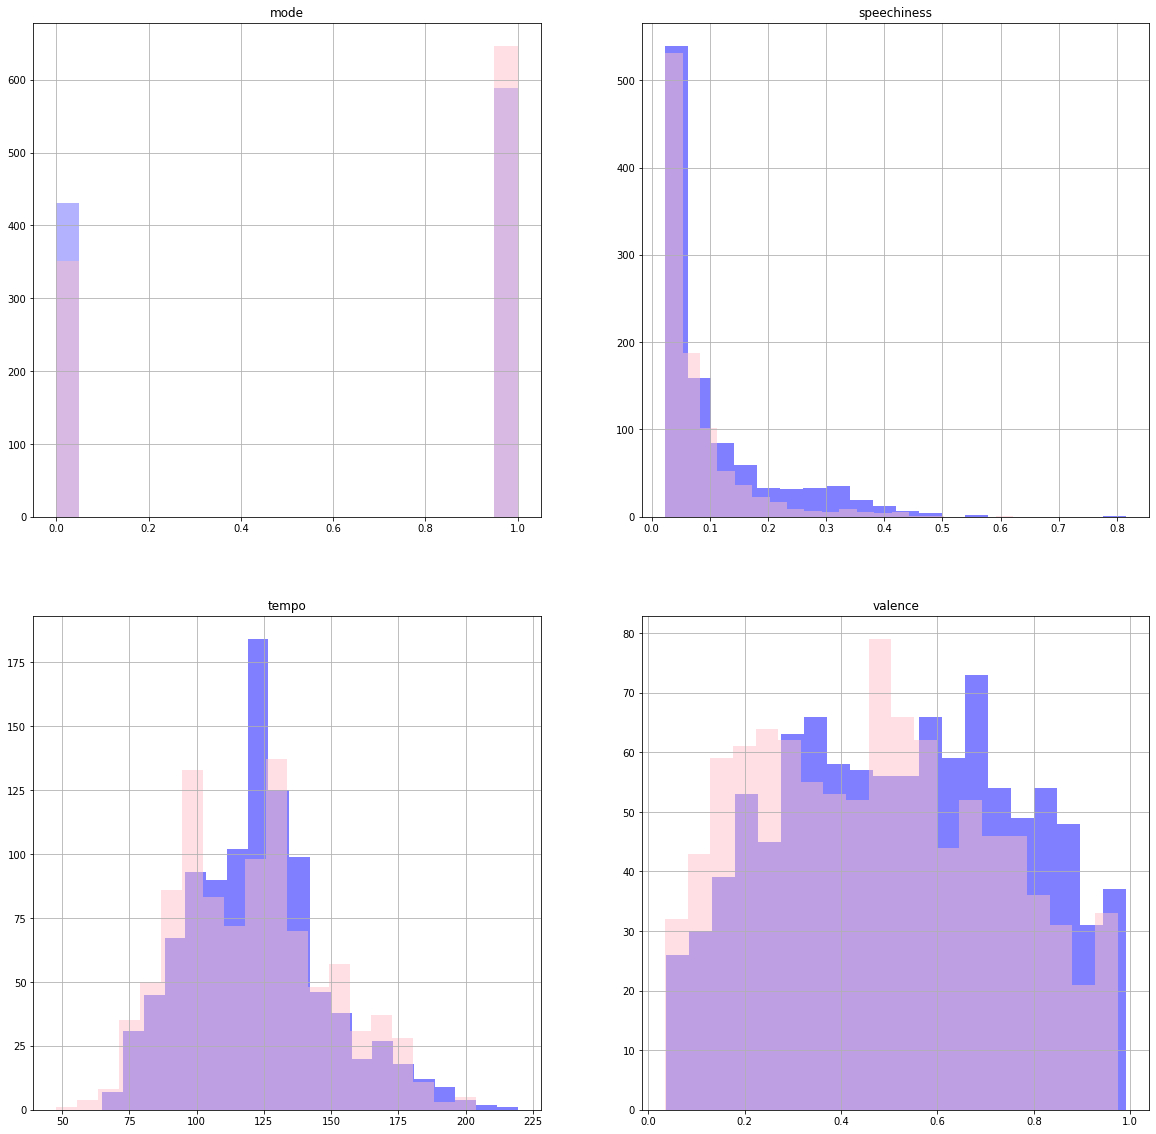

In [190]:
gusta_disgusta('mode','speechiness','tempo','valence')

In [191]:
#De la misma manera que en el ejercicio 3.1 uso knn
Y=df[['target']]
X=df[['acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','valence']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [192]:
df = pd.DataFrame(columns = ['k' , 'Score','accuracy','precision','f-measure'])
for k in range(1, 20):
  clf = neighbors.KNeighborsClassifier(n_neighbors=k)
  clf.fit(X_train, Y_train)
  clf.score(X,Y)
  clf.predict(X)
  
  df.loc[k-1]=[k,clf.score(X,Y), accuracy_score(Y, clf.predict(X)), precision_score(Y, clf.predict(X),average='weighted'),f1_score(Y, clf.predict(X),average='weighted')]

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [193]:
df

,k,Score,accuracy,precision,f-measure
0,1.0,0.907784,0.907784,0.907783,0.907783
1,2.0,0.742191,0.742191,0.787765,0.732395
2,3.0,0.735250,0.735250,0.735241,0.735239
3,4.0,0.682201,0.682201,0.703276,0.674763
4,5.0,0.685176,0.685176,0.685160,0.685160
5,6.0,0.670302,0.670302,0.683909,0.665029
6,7.0,0.666832,0.666832,0.666836,0.666740
7,8.0,0.655429,0.655429,0.664287,0.651614
8,9.0,0.654933,0.654933,0.654910,0.654880
9,10.0,0.661874,0.661874,0.666437,0.660142


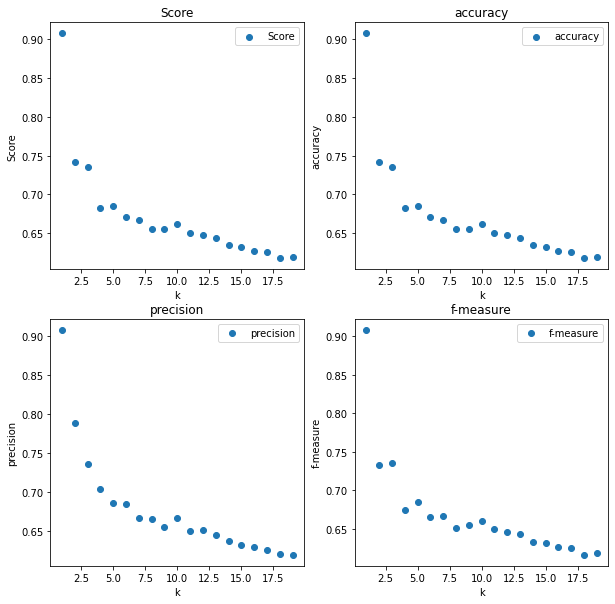

In [194]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(df['k'], df['Score'],label='Score')
plt.xlabel("k")
plt.ylabel("Score")
plt.title('Score')
plt.legend()
plt.subplot(2,2,2)
plt.scatter(df['k'], df['accuracy'], label='accuracy')
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title('accuracy')
plt.legend()
plt.subplot(2,2,3)
plt.scatter(df['k'], df['precision'], label='precision')
plt.xlabel("k")
plt.ylabel("precision")
plt.title('precision')
plt.legend()
plt.subplot(2,2,4)
plt.scatter(df['k'], df['f-measure'], label='f-measure')
plt.xlabel("k")
plt.ylabel("f-measure")
plt.title('f-measure')
plt.legend()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


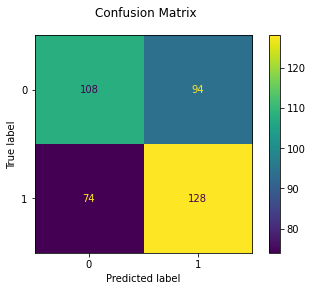

In [195]:
disp = metrics.plot_confusion_matrix(clf, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix");

In [196]:
#Pruebo con árbol de decisión para ver si da mejor (y efectivamente da mejor, puede notarse en la matriz de confusión)
clf2 = DecisionTreeClassifier()
clf2.fit(X_train, Y_train)
clf2.score(X,Y), accuracy_score(Y, clf2.predict(X)), precision_score(Y, clf2.predict(X),average='weighted'),f1_score(Y, clf2.predict(X),average='weighted')


(0.9380267724343084,
 0.9380267724343084,
 0.9380865920466382,
 0.9380287832933212)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


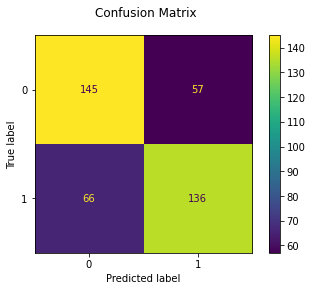

In [197]:
disp = metrics.plot_confusion_matrix(clf2, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix");